In [ ]:
# Okay, in this exercise we want to plot the box plot of three professions : 
# Data Analyst, Data Analyst, Data Engineer, Data Scientist

# See we can use traditional fig, ax method but in this exercise we will use list for plotting the graphs
# PTBN, list and dictionary can hold dataframes and series as the individual items ; so we are going to use this property
# Also list plotting can effectively work on 0 or 1 axis plots like box plots or pie charts as it takes one axis for labeling

# Fine, lets get started...

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df_og = df.copy()

df_us = df[df['job_country'] == "United States"].copy()
df_us.dropna(subset = "salary_year_avg", inplace = True)

df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 92 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15766 non-null  object        
 1   job_title              15766 non-null  object        
 2   job_location           15544 non-null  object        
 3   job_via                15766 non-null  object        
 4   job_schedule_type      15752 non-null  object        
 5   job_work_from_home     15766 non-null  bool          
 6   search_location        15766 non-null  object        
 7   job_posted_date        15766 non-null  datetime64[ns]
 8   job_no_degree_mention  15766 non-null  bool          
 9   job_health_insurance   15766 non-null  bool          
 10  job_country            15766 non-null  object        
 11  salary_rate            15766 non-null  object        
 12  salary_year_avg        15766 non-null  float64       
 13  sala

In [14]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_job_list = [df_us[df_us['job_title_short'] == job_title]["salary_year_avg"] for job_title in job_titles]

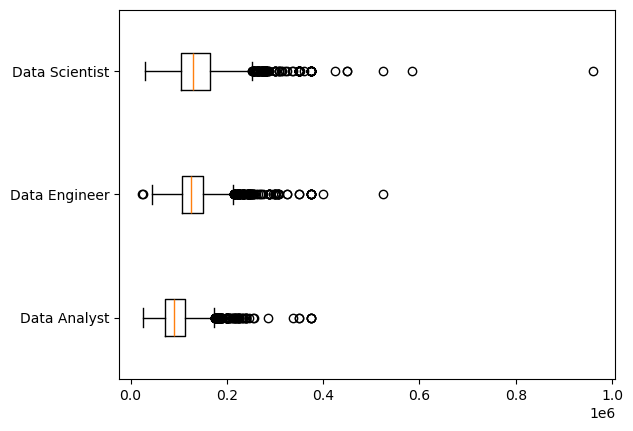

In [ ]:
plt.boxplot(df_job_list, tick_labels = job_titles, vert = False)
plt.show()

In [16]:
# Okay lets refine it

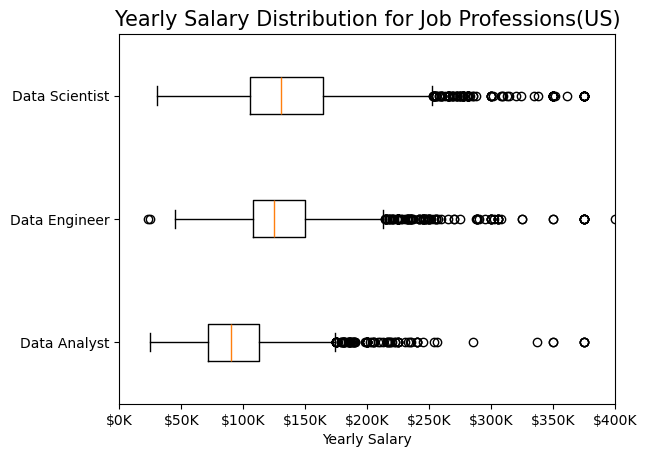

In [22]:
plt.boxplot(df_job_list, tick_labels = job_titles, vert = False)
plt.title("Yearly Salary Distribution for Job Professions(US)", fontsize = 15)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f"${int(x/1000)}K"))
plt.xlim(0,400000)
plt.xlabel("Yearly Salary")
plt.show()